1st STEP: Import all necessary libraries (IMPORT AND INSTALL DEPENDENCIES)

In [274]:
import cv2
import numpy as np
import os 
import matplotlib.pyplot as plt
import time
import mediapipe as mp

2nd STEP: Defining the Holistic models and drawing utilities variables (KEYPOINTS USING MP HOLISTIC)

In [275]:
mp_holistic = mp.solutions.holistic        #Holistic model; Make the detections
mp_drawing = mp.solutions.drawing_utils     #Drawing utilities; Draw the detections

Make functions for reuse of Holistic models and drawing utilities variables for detections

In [276]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Will pass the Image and the Holistic Model in Blue_Green_Red to Red_Green_Blue; Colour Conversion using cv2.cvtColor
    image.flags.writeable = False                  #Sets image writeable to False
    results = model.process(image)                 #Making the Prediction
    image.flags.writeable = True                   #Sets image writeable to True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #Will pass the Image and the Holistic Model in Red_Green_Blue TO Blue_Green_Red; Colour Conversion
    return image, results                          #Returns the image and result into the loop

Make functions for reuse in drawing landmarks where you pass it through image, result of landmarks then lastly to holistic model of landmark connection

In [277]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)         #Will draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)         #Will draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)    #Will draw left_hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)   #Will draw right_hand connections

In [278]:
def draw_styled_landmarks(image, results):
    #Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                              ) #BGR to RGB Landmark and Connection
    
    #Draw pose connections     
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                              ) #BGR to RGB Landmark and Connection
     
    #Draw left_hand connections        
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                              ) #BGR to RGB Landmark and Connection
      
     #Draw right_hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,110,10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                              ) #BGR to RGB Landmark and Connection 

In [279]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

Access MediaPipe Holistic Model

In [280]:
#cap  = cv2.VideoCapture(0)                 #Accessing web cam using variable cap

Set MediaPipe Model

In [281]:
cap  = cv2.VideoCapture(0)  
 
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic: #Able to access the holistic model by creating detention confidence and tracking it by 0.5
   
    while cap.isOpened():                      #Initiate loop in web cam
    
        #Read Feed
        ret, frame = cap.read()                #Read frame from prescribed time, If stacked together will look like a video capture. This will return Value and Frame
        
        #Make Detection
        image, results =mediapipe_detection(frame, holistic)
        print (results)

        #Draw Landmarks
        draw_styled_landmarks(image, results)

        #Show to Screen
        cv2.imshow('OpenCV Feed', image)       #Will show frame and have them placed in OpenCV Feed

        #Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'): #Wait for 'q' key to be pressed to break from the loop
            break
    cap.release()  #Realese the Web Cam
    cv2.destroyAllWindows()  #Destroy all Windows

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [282]:
results.left_hand_landmarks.landmark #Their are face_landmarks(), count(), index, left_hand_landmarks(), mro(), pose_landmarks(), right_hand_landmarks()

[x: 0.8021900057792664
y: 0.7213248014450073
z: 2.6195871782874747e-07
, x: 0.7565612196922302
y: 0.70362389087677
z: -0.0179115142673254
, x: 0.7123441696166992
y: 0.6623164415359497
z: -0.029819689691066742
, x: 0.6766613125801086
y: 0.629751980304718
z: -0.04124654084444046
, x: 0.6408477425575256
y: 0.6117986440658569
z: -0.053191401064395905
, x: 0.7260691523551941
y: 0.5612956285476685
z: -0.015420686453580856
, x: 0.69608473777771
y: 0.5024354457855225
z: -0.03289153426885605
, x: 0.678533136844635
y: 0.4653699994087219
z: -0.047958385199308395
, x: 0.6660778522491455
y: 0.4302319288253784
z: -0.05934476852416992
, x: 0.7545710802078247
y: 0.5432320833206177
z: -0.020550496876239777
, x: 0.7343622446060181
y: 0.46716052293777466
z: -0.03490898013114929
, x: 0.7212523221969604
y: 0.4196855425834656
z: -0.04826166108250618
, x: 0.7095143795013428
y: 0.3787364065647125
z: -0.05870028957724571
, x: 0.785470724105835
y: 0.5424643158912659
z: -0.028671327978372574
, x: 0.7760257124900

In [283]:
frame

array([[[105,  97, 121],
        [106,  98, 122],
        [107, 100, 121],
        ...,
        [194, 200, 203],
        [203, 204, 199],
        [205, 206, 202]],

       [[115, 108, 130],
        [115, 108, 130],
        [109, 103, 122],
        ...,
        [196, 200, 202],
        [201, 205, 198],
        [202, 207, 199]],

       [[113, 105, 129],
        [114, 106, 130],
        [112, 104, 128],
        ...,
        [193, 203, 201],
        [201, 207, 202],
        [202, 208, 203]],

       ...,

       [[ 42,  33,  59],
        [ 26,  17,  43],
        [ 23,  16,  38],
        ...,
        [ 21,  24,  35],
        [ 19,  29,  34],
        [ 20,  30,  35]],

       [[ 38,  31,  57],
        [ 26,  19,  45],
        [ 21,  16,  38],
        ...,
        [ 19,  25,  33],
        [ 21,  28,  34],
        [ 25,  32,  37]],

       [[ 34,  31,  54],
        [ 27,  24,  47],
        [ 25,  23,  43],
        ...,
        [ 25,  26,  37],
        [ 22,  24,  38],
        [ 23,  25,  39]]

In [284]:
results

mediapipe.python.solution_base.SolutionOutputs

In [285]:
draw_styled_landmarks(frame, results)

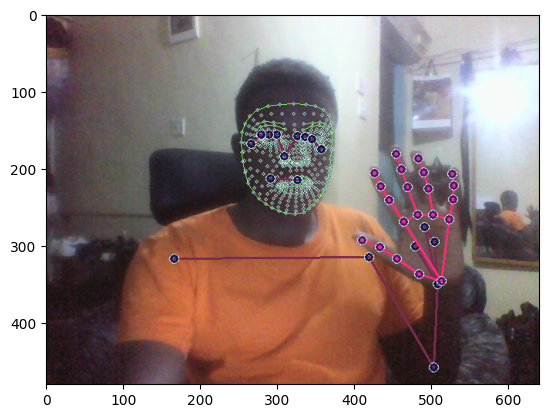

In [286]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) #Convert to real original color of the frame 

3rd STEP: EXTRACT KEYPOINTS VALUES

In [287]:
len(results.pose_landmarks.landmark)

33

In [288]:
#Create arrays for all landmarks
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)
pose

[array([ 0.48390999,  0.38437369, -0.9552148 ,  0.99995631]),
 array([ 0.51050597,  0.32966286, -0.87314796,  0.99992955]),
 array([ 0.52518493,  0.33303303, -0.87326324,  0.99993378]),
 array([ 0.54025936,  0.33763921, -0.87272137,  0.99992591]),
 array([ 0.46784997,  0.32551667, -0.90545142,  0.99991947]),
 array([ 0.45202661,  0.32554242, -0.90514767,  0.9999193 ]),
 array([ 0.43647471,  0.32677916, -0.90568608,  0.99990469]),
 array([ 0.55936587,  0.3651973 , -0.37954491,  0.99993092]),
 array([ 0.4168717 ,  0.35030854, -0.52184081,  0.99994242]),
 array([ 0.51020443,  0.44940642, -0.77118725,  0.99995536]),
 array([ 0.4553639 ,  0.44518095, -0.8133049 ,  0.99995416]),
 array([ 0.65524471,  0.65758663, -0.00829505,  0.99954718]),
 array([ 0.26000819,  0.66197354, -0.29022333,  0.99834532]),
 array([ 0.78686887,  0.95495492, -0.45021471,  0.89975631]),
 array([ 0.19831777,  1.03824317, -0.47381788,  0.68659329]),
 array([ 0.793984  ,  0.72922134, -1.33810818,  0.99128151]),
 array([

In [289]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten()
len(pose) 
#pose = 33 shape (33, 4) AND if .flatten() pose = 132 (reshape it to (132,) One bigger array

132

In [290]:
results.left_hand_landmarks.landmark

[x: 0.8021900057792664
y: 0.7213248014450073
z: 2.6195871782874747e-07
, x: 0.7565612196922302
y: 0.70362389087677
z: -0.0179115142673254
, x: 0.7123441696166992
y: 0.6623164415359497
z: -0.029819689691066742
, x: 0.6766613125801086
y: 0.629751980304718
z: -0.04124654084444046
, x: 0.6408477425575256
y: 0.6117986440658569
z: -0.053191401064395905
, x: 0.7260691523551941
y: 0.5612956285476685
z: -0.015420686453580856
, x: 0.69608473777771
y: 0.5024354457855225
z: -0.03289153426885605
, x: 0.678533136844635
y: 0.4653699994087219
z: -0.047958385199308395
, x: 0.6660778522491455
y: 0.4302319288253784
z: -0.05934476852416992
, x: 0.7545710802078247
y: 0.5432320833206177
z: -0.020550496876239777
, x: 0.7343622446060181
y: 0.46716052293777466
z: -0.03490898013114929
, x: 0.7212523221969604
y: 0.4196855425834656
z: -0.04826166108250618
, x: 0.7095143795013428
y: 0.3787364065647125
z: -0.05870028957724571
, x: 0.785470724105835
y: 0.5424643158912659
z: -0.028671327978372574
, x: 0.7760257124900

In [293]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten()
lh

array([ 8.02190006e-01,  7.21324801e-01,  2.61958718e-07,  7.56561220e-01,
        7.03623891e-01, -1.79115143e-02,  7.12344170e-01,  6.62316442e-01,
       -2.98196897e-02,  6.76661313e-01,  6.29751980e-01, -4.12465408e-02,
        6.40847743e-01,  6.11798644e-01, -5.31914011e-02,  7.26069152e-01,
        5.61295629e-01, -1.54206865e-02,  6.96084738e-01,  5.02435446e-01,
       -3.28915343e-02,  6.78533137e-01,  4.65369999e-01, -4.79583852e-02,
        6.66077852e-01,  4.30231929e-01, -5.93447685e-02,  7.54571080e-01,
        5.43232083e-01, -2.05504969e-02,  7.34362245e-01,  4.67160523e-01,
       -3.49089801e-02,  7.21252322e-01,  4.19685543e-01, -4.82616611e-02,
        7.09514380e-01,  3.78736407e-01, -5.87002896e-02,  7.85470724e-01,
        5.42464316e-01, -2.86713280e-02,  7.76025712e-01,  4.71849203e-01,
       -4.38031740e-02,  7.66457081e-01,  4.28397119e-01, -5.37249334e-02,
        7.55139649e-01,  3.90990108e-01, -6.13654591e-02,  8.18423033e-01,
        5.55869162e-01, -

In [295]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten()
rh

AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
np.zeros(21*3)